<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_51_MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST-keras
- 케라스를 이용한 MNIST

## 데이터 로드

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


## MNIST 이미지 확인 및 데이터 전처리

<function matplotlib.pyplot.show>

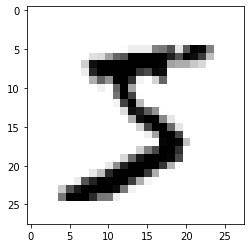

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## MLP 로 구현(케라스 사용)

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28, 28, 1)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 28, 100)       200       
_________________________________________________________________
dense_1 (Dense)              (None, 28, 28, 100)       10100     
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                784010    
Total params: 794,310
Trainable params: 794,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 6s 5ms/step - loss: 0.4547 - accuracy: 0.8637
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.2864 - accuracy: 0.9178
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.2740 - accuracy: 0.9244
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.2610 - accuracy: 0.9282
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.2428 - accuracy: 0.9332


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2494 - accuracy: 0.9327
test_acc =  0.932699978351593


## CNN 모델 생성

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

## 훈련

In [ ]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 7s 3ms/step - loss: 0.3766 - accuracy: 0.8828
Epoch 2/3
938/938 [==============================] - 3s 3ms/step - loss: 0.0511 - accuracy: 0.9839
Epoch 3/3
938/938 [==============================] - 3s 3ms/step - loss: 0.0331 - accuracy: 0.9897


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

10000/10000 [==============================] - 1s 59us/step
test_acc =  0.9903
